51
100
105
256


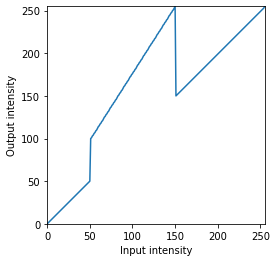

True

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


''' Quesstion one '''

t1 = np.linspace(0,50,51).astype('uint8')
print(len(t1))

t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))

t3 = np.linspace(150, 255, 255 - 150).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('./emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('transformed_emma.jpg', image_transformed)


151
50
55
256


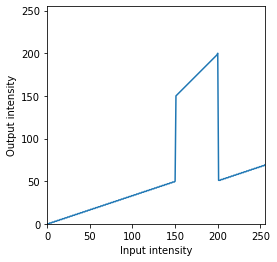

True

In [17]:
''' Quesstion two (a)'''

# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

t1 = np.linspace(0,50,150-0+1).astype('uint8')
print(len(t1))

t2 = np.linspace(150, 200, 200-150).astype('uint8')
print(len(t2))

t3 = np.linspace(51, 69, 255 - 200).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('gray_incr.png')
plt.show()

img_orig = cv.imread('./BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
# cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Garish_Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('Grayish_Image.jpg', image_transformed)


201
55
256


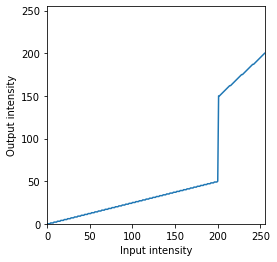

True

In [18]:
''' Quesstion two (b)'''

# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

t1 = np.linspace(0,50,200-0+1).astype('uint8')
print(len(t1))

t2 = np.linspace(150, 200, 255-200).astype('uint8')
print(len(t2))

# t3 = np.linspace(51, 69, 255 - 200).astype('uint8')
# print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('white_incr.png')
plt.show()

img_orig = cv.imread('./BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
# cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Whitish_Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('Whitish_Image.jpg', image_transformed)
